In [13]:
import importlib
import os
import logging
import numpy as np
from params import params
import params
importlib.reload(params)

#logging.basicConfig(encoding='utf-8', level=logging.DEBUG)
import rwkv_runner
importlib.reload(rwkv_runner)
from rwkv_runner import rwkv
importlib.reload(rwkv_runner)
from source_file_iterator import SourceFileIterator
import source_file_iterator
importlib.reload(source_file_iterator)

modelname = 'RWKV-4-Raven-3B-v11-Eng49%-Chn49%-Jpn1%-Other1%-20230429-ctx4096.pth'

os.environ["RWKV_CUDA_ON"] = '1'
r = rwkv(modelname,
         '20B_tokenizer.json',
         model_load=False)

<class 'tokenizers.Tokenizer'>
tokenizer class= <class 'tokenizers.Tokenizer'>
key_prefix= rwkv:RWKV-4-Raven-3B-v11-Eng49%-Chn49%-Jpn1%-Other1%-20230429-ctx4096.pth


# normalize+(1.0-dis)の結果

In [14]:
scores = r.getAllScores()

In [16]:
scores

[0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.4222222222222222,
 0.36,
 0.44,
 0.3511111111111111,
 0.3422222222222222,
 0.4222222222222222,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7155555555555555,
 0.7333333333333333,
 0.49333333333333335,
 0.5733333333333334,
 0.5377777777777778,
 0.52,
 0.5111111111111111,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333]

In [15]:
np.array(scores).reshape(-1, len(r.numTokensList))

array([[0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.42222222],
       [0.36      , 0.44      , 0.35111111, 0.34222222, 0.42222222],
       [0.73333333, 0.73333333, 0.73333333, 0.71555556, 0.73333333],
       [0.49333333, 0.57333333, 0.53777778, 0.52      , 0.51111111],
       [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333]])

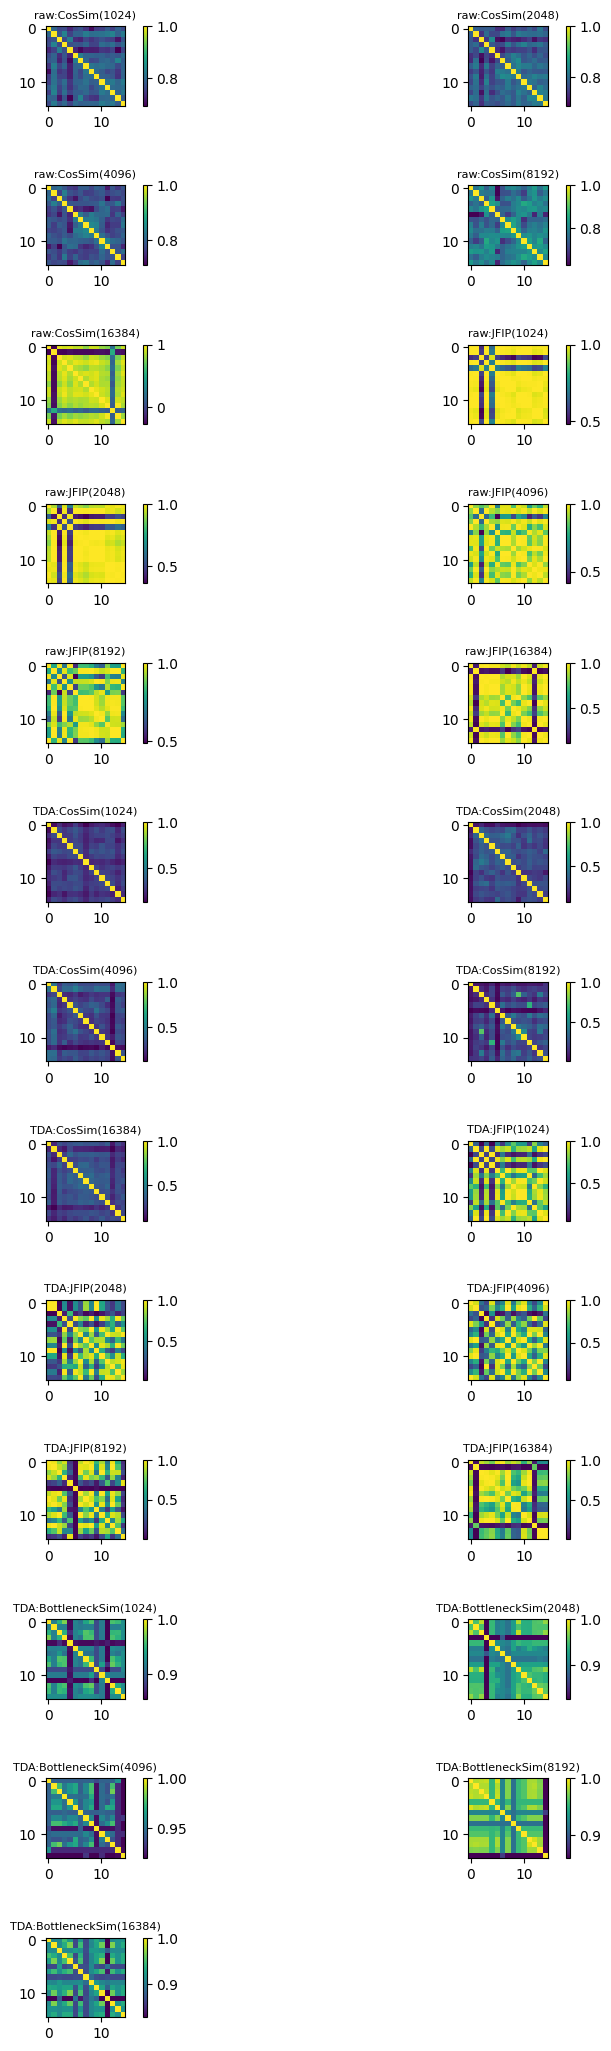

In [5]:
r.all_simMatrixPlot()

data_subdirs= ['carroll', 'einstein', 'lovecraft']
numTokensList= [1024, 2048, 4096, 8192, 16384]


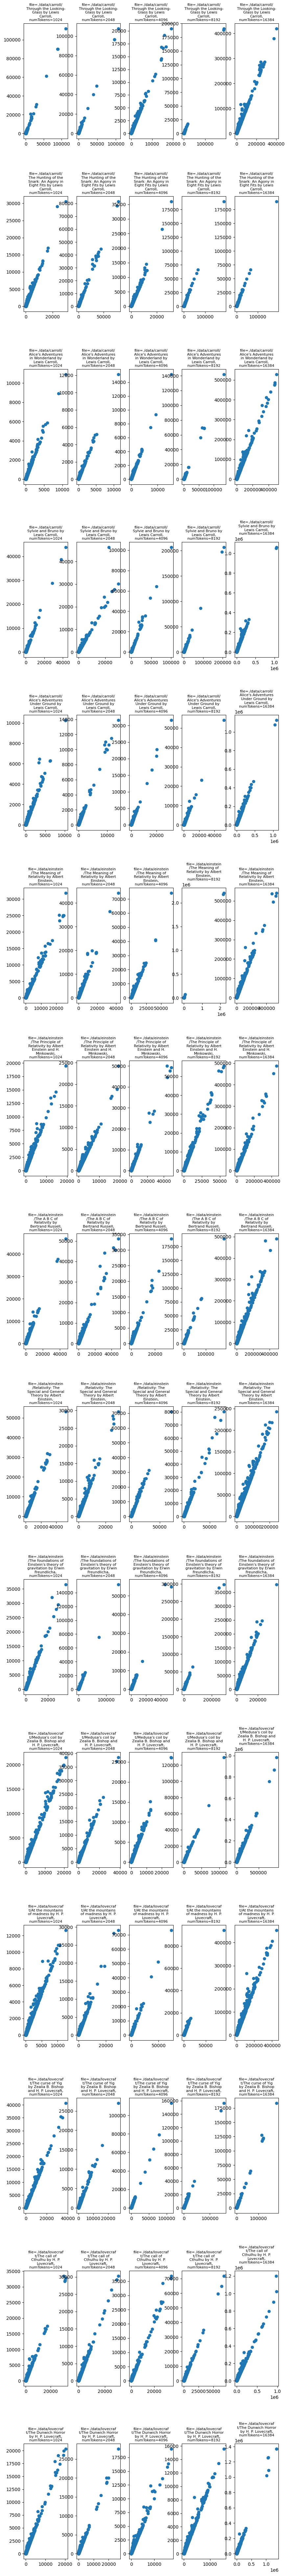

In [17]:
r.all_pd_plot()

# scaling(const=400000)．ただし，cos/jfipもscalingするべきだろうけどまだやってない